# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [100]:
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [101]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('C:/Users/jlpar/Documents/Springboard Data Files/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [102]:
# dealing with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\jlpar\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


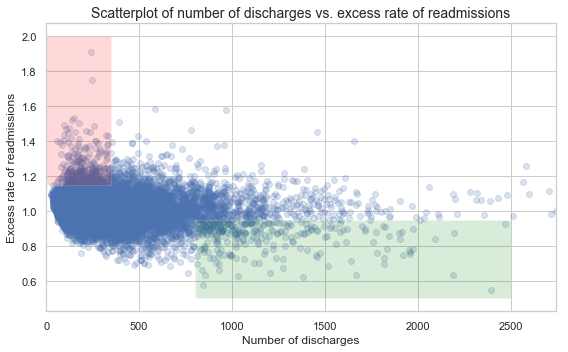

In [103]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [104]:
# Your turn
# Converting the file to the data_c format and looking at the top five rows
data_c=clean_hospital_read_df 
data_c.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [105]:
# Fixing the Column Names and making all words lower case, removing spaces and puting underscores between words
data_c.columns = data_c.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [106]:
## Looking at the number of rows and columns again to make sure it is the same
data_c.shape

(11578, 12)

In [107]:
# Checking the new column names from the previous cell
data_c.columns

Index(['hospital_name', 'provider_number', 'state', 'measure_name',
       'number_of_discharges', 'footnote', 'excess_readmission_ratio',
       'predicted_readmission_rate', 'expected_readmission_rate',
       'number_of_readmissions', 'start_date', 'end_date'],
      dtype='object')

In [9]:
#import pandas_profiling as pp which will not be run because it takes up to much space in the github account
#pp.ProfileReport(data_c)

In [109]:
## Standard info statement to look at the number of missing data points as shown in pd profiler
data_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
hospital_name                 11578 non-null object
provider_number               11578 non-null int64
state                         11578 non-null object
measure_name                  11578 non-null object
number_of_discharges          11578 non-null int32
footnote                      81 non-null float64
excess_readmission_ratio      11497 non-null float64
predicted_readmission_rate    11497 non-null float64
expected_readmission_rate     11497 non-null float64
number_of_readmissions        11497 non-null float64
start_date                    11578 non-null object
end_date                      11578 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [110]:
# Looking for missing values in the columns for excess_readmission_ratio
data_c.excess_readmission_ratio.isnull().values.any()

True

In [111]:
# Looking for missing values in the columns for number of discharges
data_c.number_of_discharges.isnull().values.any()

False

In [112]:
# Dropping the missing values for the excess readmission ratio
new_data=data_c.dropna(subset=['excess_readmission_ratio'])

In [113]:
# Looking at the cleaned dataframe
new_data.head(3)

,hospital_name,provider_number,state,measure_name,number_of_discharges,footnote,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013


In [114]:
# Looking at the number of rows for the cleaned dataframe
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 12 columns):
hospital_name                 11497 non-null object
provider_number               11497 non-null int64
state                         11497 non-null object
measure_name                  11497 non-null object
number_of_discharges          11497 non-null int32
footnote                      0 non-null float64
excess_readmission_ratio      11497 non-null float64
predicted_readmission_rate    11497 non-null float64
expected_readmission_rate     11497 non-null float64
number_of_readmissions        11497 non-null float64
start_date                    11497 non-null object
end_date                      11497 non-null object
dtypes: float64(5), int32(1), int64(1), object(5)
memory usage: 1.1+ MB


In [115]:
# Converting the new_data file to data_c1
data_c1=new_data

In [116]:
# Slicing the data based on number of dischages less than 100
d_100 = data_c1[(data_c1.number_of_discharges<100)]
len(d_100)

1188

In [117]:
# Slicing the data for number of discharges that are less than 300
d_300 = data_c1[(data_c1.number_of_discharges<300)]
len(d_300)

6108

In [118]:
# Slicing the data for number of discharges that are more than 1000
d_1000 = data_c1[(data_c1.number_of_discharges> 1000)]
len(d_1000)

463

In [119]:
# Slicing the data for the number of discharges greater than 100
d_more_100 = data_c1[(data_c1.number_of_discharges> 100)]
len(d_more_100)

10274

In [21]:
# Slicing the data for the number of dicharges that areless than 1000
d_less_1000 = data_c1[(data_c1.number_of_discharges < 1000)]
len(d_less_1000)

11033

In [120]:
# Taking one final slice for data that is more than 100 and less than 1000 discharges
d_101_999 = d_less_1000[(data_c1.number_of_discharges>100)]
len(d_101_999)

C:\Users\jlpar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


9810

Question 1)
The Null Hypothesis for this data set states there is NO DIFFERENCE in readmission rates for the number of discharges
that are less than 100 and for those that are more than 1000 for this data set.

The Alternative Hypothesis states that there is a significanct difference between the readmission rates of 1.023 for the 
number of discharges that are less than 100 and readmission rates of 0.978 for number of discharges of more than 1000 with 
as 0.01 significance level.  

Question 2 and 3)
The p value for the significance level of 0.01 will be computed for the readmission rates of the sample population that 
contains less than 100 number of discharges and for more than 1000 discharges.  The length or number of values that are 
are as follows for the following attributes;
a_100 is for the readmission rates greater than 1 for number of discharges less than 100
a1_100 is for the readmission rates less than 1 for the number of discharges less than 100

b_1000 is for the readmission rates greater than 1 for number of discharges less than 1000
b1_1000 is for the readmission rates less than 1 for the number of discharges less than 1000

dd_300 is for the readmission rates greater than 1 for number of discharges less than 300
dd1_300 is for the readmission rates less than 1 for the number of discharges less than 300

These values are calculated below and will be used for calculating the standard error, margin of error, 
Z Score and p value for number of discharges of less than 100 to more than 1000.  This will also be used to compare
the number of dicharges less than 300 to more than 1000 for Readmission Rates

In [121]:
a_100= d_100[(d_100.excess_readmission_ratio > 1)]
print('Number Discharges < than 100 with Readmission Rates > 1 is:', len(a_100))

Number Discharges < than 100 with Readmission Rates > 1 is: 751


In [122]:
a1_100= d_100[(d_100.excess_readmission_ratio <= 1)]
print('Number Discharges < than 100 with Readmission Rates < 1 is:', len(a1_100))

Number Discharges < than 100 with Readmission Rates < 1 is: 437


In [123]:
b_1000= d_1000[(d_1000.excess_readmission_ratio > 1)]
print('Number Discharges > than 1000 with Readmission Rates > 1 is:', len(b_1000))

Number Discharges > than 1000 with Readmission Rates > 1 is: 206


In [124]:
b1_1000= d_1000[(d_1000.excess_readmission_ratio <= 1)]
print('Number Discharges > than 1000 with Readmission Rates < 1 is:',len(b1_1000))

Number Discharges > than 1000 with Readmission Rates < 1 is: 257


In [125]:
c= d_101_999[(d_101_999.excess_readmission_ratio > 1)]
print('Number Discharges between 100 and 1000 with Readmission Rates > 1 is:',len(c))

Number Discharges between 100 and 1000 with Readmission Rates > 1 is: 4967


In [126]:
c1= d_101_999[(d_101_999.excess_readmission_ratio <= 1)]
print('Number Discharges between 100 and 1000 with Readmission Rates < 1 is:',len(c1))

Number Discharges between 100 and 1000 with Readmission Rates < 1 is: 4843


In [127]:
dd_300= d_300[(d_300.excess_readmission_ratio > 1)]
print('Number Discharges < than 300 with Readmission Rates > 1 is:',len(dd_300))

Number Discharges < than 300 with Readmission Rates > 1 is: 3283


In [128]:
dd1_300= d_300[(d_300.excess_readmission_ratio < 1)]
print('Number Discharges < than 300 with Readmission Rates > 1 is:',len(dd1_300))

Number Discharges < than 300 with Readmission Rates > 1 is: 2819


In [31]:
###################### Z Score and p Value 

In [129]:
p_100 = len(a_100)/(len(a_100)+len(a1_100))
p_1000 = len(b_1000)/(len(b_1000)+len(b1_1000))
diff_prop = abs(p_100-p_1000)
print('probability for less than 100 Readmissions', p_100)
print('probability for more than 1000 Readmissions', p_1000)
print('probability for pooled proportions:',  diff_prop)

probability for less than 100 Readmissions 0.6321548821548821
probability for more than 1000 Readmissions 0.4449244060475162
probability for pooled proportions: 0.18723047610736593


In [130]:
## Compute the total number of discharges based on readmissions
r_100 = len(d_100)
r_1000 = len(d_1000)
r_tot = r_100+r_1000
print('Total number of readmissions for less than 100:',r_100)
print('Total number of readmissions for more than 1000:',r_1000)
print('Total combined readmissions for 100 and 1000:',r_tot)

Total number of readmissions for less than 100: 1188
Total number of readmissions for more than 1000: 463
Total combined readmissions for 100 and 1000: 1651


In [131]:
## Calculating the Standard Error of the differences between the readmissions
## This will be the square root of the probability times 1 minus the probability for each group
## of readmissions and this is divided by the total number of applicants for each race in this study

se_100=(p_100*(1-p_100)/r_100)
se_1000=(p_1000*(1-p_1000)/r_1000)

se=np.sqrt(se_100+se_1000)
print('Standard Error for the Differnence of the Means', round(se, 5))

Standard Error for the Differnence of the Means 0.027


In [132]:
# Calculating the Margin of Error
from scipy import stats

margin_of_error = stats.norm.ppf(1-((1-0.99)/2)) * se 
print('margin of error:', round(margin_of_error, 5))

margin of error: 0.06955


In [133]:
## Calculating the Upper and Lower Confidence Limit 
CL=0.99
CI_lower, CI_upper = stats.norm.interval(CL, loc=p_100-p_1000, scale=se)
print('Lower CI:', round(CI_lower, 5))
print('Upper CI:', round(CI_upper, 5))

Lower CI: 0.11768
Upper CI: 0.25678


In [134]:
## The Z score will be the difference in the proportions divided by the stardard error
z = (abs(p_100-p_1000)/se)
print('The Z_Value is:', round(z, 5))

The Z_Value is: 6.93379


In [135]:
## Calculating the p value 
p_val=(1-stats.norm.cdf(z))*2
print(round(p_val, 6))

0.0


In [39]:
#######################################################
#######################################################

In [136]:
print('These are the results for the differences between readmission rates of < 100 and > 1000')

print('Standard Error for the Differnence of the Means', round(se, 5))
print('Lower CI:', round(CI_lower, 5))
print('Upper CI:', round(CI_upper, 5))
print('The Z_Value is:', round(z, 5))

These are the results for the differences between readmission rates of < 100 and > 1000
Standard Error for the Differnence of the Means 0.027
Lower CI: 0.11768
Upper CI: 0.25678
The Z_Value is: 6.93379


In [41]:
########################################################
## Calculating the Z score for differences in admission rates between values < 300 and greater than 1000

In [137]:
p_300 = len(dd_300)/(len(dd_300)+len(dd1_300))
p_1000 = len(b_1000)/(len(b_1000)+len(b1_1000))
diff_prop_300 = abs(p_300-p_1000)
print('Probability for 300 Readmissions', p_300)
print('Probability for 1000 Readmissions', p_1000)
print('probability for pooled proportions:',  diff_prop)

Probability for 300 Readmissions 0.5380203212061619
Probability for 1000 Readmissions 0.4449244060475162
probability for pooled proportions: 0.18723047610736593


In [138]:
## Compute the total count for less than 300 and more than 1000
r_300 = len(d_300)
r_1000 = len(d_1000)
r_tot2 = r_300+r_1000
print('Total number of readmissions for less than 300:',r_300)
print('Total number of readmissions for more than 1000:',r_1000)
print('Total combined readmissions for 100 and 1000:',r_tot2)

Total number of readmissions for less than 300: 6108
Total number of readmissions for more than 1000: 463
Total combined readmissions for 100 and 1000: 6571


In [139]:
## Calculating the Standard Error of the differences between the readmissions
## This will be the square root of the probability times 1 minus the probability for each group
## of readmissions and this is divided by the total number of applicants for each race in this study

se_300=(p_300*(1-p_300)/r_300)
se_1000=(p_1000*(1-p_1000)/r_1000)

se2=np.sqrt(se_300+se_1000)
print('Standard Error for the Differnence of the Means', round(se2, 5))

Standard Error for the Differnence of the Means 0.02396


In [140]:
#Calculate the margin of error
from scipy import stats

margin_of_error2 = stats.norm.ppf(1-((1-0.99)/2)) * se2
print('Margin of error:', round(margin_of_error2, 5))

Margin of error: 0.06172


In [141]:
## Calculating the Upper and Lower Confidence Limit 
CL=0.99
CI2_lower, CI2_upper = stats.norm.interval(CL, loc=p_300-p_1000, scale=se2)
print('Lower CI:', round(CI2_lower, 5))
print('Upper CI:', round(CI2_upper, 5))

Lower CI: 0.03138
Upper CI: 0.15481


In [142]:
## The Z score will be the difference in the proportions divided by the stardard error
z2 = (abs(p_300-p_1000)/se2)
print('The Z_Value is:', round(z2, 5))

The Z_Value is: 3.88541


In [143]:
## Calculating the p value 
p_val2=(1-stats.norm.cdf(z2))*2
print(round(p_val2, 6))

0.000102


In [144]:
print('These are the results for the differences between readmission rates of < 300 and > 1000')

print('Standard Error for the Differnence of the Means', round(se2, 5))
print('Lower CI:', round(CI2_lower, 5))
print('Upper CI:', round(CI2_upper, 5))
print('The Z_Value is:', round(z2, 5))
print('The p-value is:', round(p_val2, 5))

These are the results for the differences between readmission rates of < 300 and > 1000
Standard Error for the Differnence of the Means 0.02396
Lower CI: 0.03138
Upper CI: 0.15481
The Z_Value is: 3.88541
The p-value is: 0.0001


Question 4) 
Discuss statistical significance and practical significance. Do they differ here? 
How does this change your recommendation to the client?


These are the results for the differences between readmission rates of < 100 and > 1000
Standard Error for the Differnence of the Means 0.027
Lower CI: 0.11768
Upper CI: 0.25678
The Z_Value is: 6.93379


These are the results for the differences between readmission rates of < 300 and > 1000
Standard Error for the Differnence of the Means 0.02396
Lower CI: 0.03138
Upper CI: 0.15481
The Z_Value is: 3.88541
The p-value is: 0.0001

The hospitals that have less than 100 and even less than 300 discharges are significantly different from hospitals that have more than 1000 discharges for excess readmission rates as shown with both p values less than 0.01.  The Z Score is 6.93 and 3.89 for these two hypothesis' that were run for this study.  The statistical conclusion is correct for this study and the smaller hospitals have a statiscally higher readmission rate when compared to the larger hospitals.  The smaller hospitals may lack the resources needed to provide quality care and needs to be determined how these impact the hospital.  Also, additional studies need to be conducted to determine the cause of the excessive readmission rates.  When the cause of the higher readmission rates have been identified, then the hosptial can figure out ways to minimize these excessive readmission rates to preserve the hospital resources.  

In [ ]:
############################################################################################

In [76]:
# creatign bins for the number of discharges and dividing this attribute into 6 categories for graphing 
data_c2=data_c1
bins = [0,100,250,500,750,1000,1000000]
group_bins = ['<100','100-250','250-500','500-750','750-1000', '1000 +']
data_c2['discharge_categories'] = pd.cut(data_c1['number_of_discharges'], bins, labels=group_bins)


C:\Users\jlpar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [145]:
data_c2.head(3)

,hospital_name,provider_number,state,measure_name,number_of_discharges,footnote,excess_readmission_ratio,predicted_readmission_rate,expected_readmission_rate,number_of_readmissions,start_date,end_date,discharge_categories,discharge-categories
1832,UNIVERSITY OF MD CHARLES REGIONAL MEDICAL CENTER,210035,MD,READM-30-AMI-HRRP,25,NaN,1.0914,26.8,24.6,12.0,07/01/2010,06/30/2013,<100,<100
1699,ATLANTIC GENERAL HOSPITAL,210061,MD,READM-30-AMI-HRRP,27,NaN,1.0961,24.8,22.6,12.0,07/01/2010,06/30/2013,<100,<100
1774,MERCY MEDICAL CENTER INC,210008,MD,READM-30-AMI-HRRP,28,NaN,1.0934,24.4,22.3,12.0,07/01/2010,06/30/2013,<100,<100


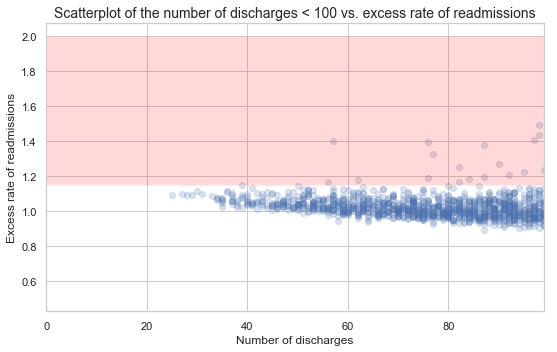

In [146]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = d_100.number_of_discharges
y = d_100.excess_readmission_ratio

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of the number of discharges < 100 vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

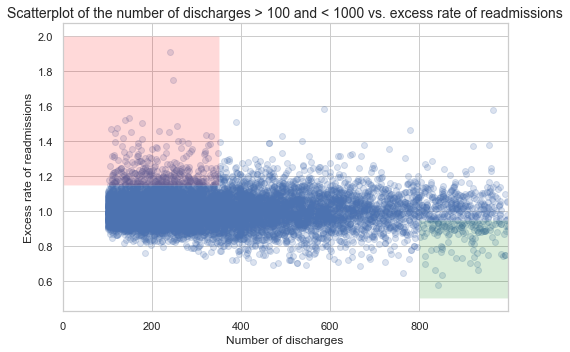

In [147]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = d_101_999.number_of_discharges
y = d_101_999.excess_readmission_ratio

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of the number of discharges > 100 and < 1000 vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

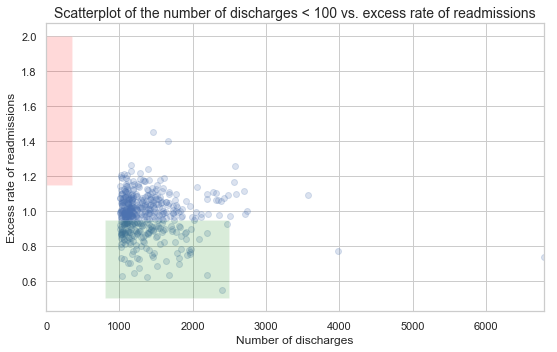

In [148]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = d_1000.number_of_discharges
y = d_1000.excess_readmission_ratio

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of the number of discharges < 100 vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

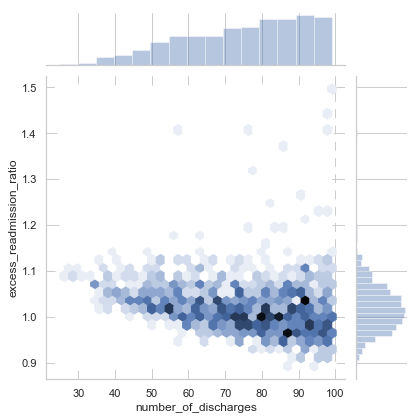

In [149]:
# Custom Hexagram Plot for the Readmission Rates for the number of discharges less than 100
sns.set(style="whitegrid")
sns.jointplot(x=d_100["number_of_discharges"], y=d_100["excess_readmission_ratio"], kind='hex')
plt.show()

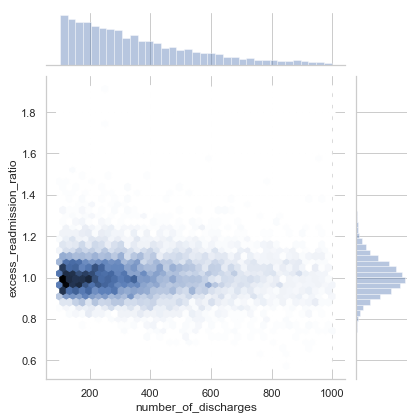

In [150]:
# Custom Hexagram Plot for the Readmission Rates for the number of discharges between 100 and 1000
sns.set(style="whitegrid")
sns.jointplot(x=d_101_999["number_of_discharges"], y=d_101_999["excess_readmission_ratio"], kind='hex')
plt.show()

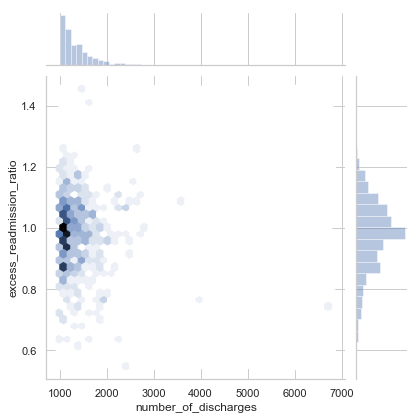

In [151]:
# Custom Hexagram Plot for the Readmission Rates for the number of discharges greater than 1000
sns.set(style="whitegrid")
sns.jointplot(x=d_1000["number_of_discharges"], y=d_1000["excess_readmission_ratio"], kind='hex')
plt.show()

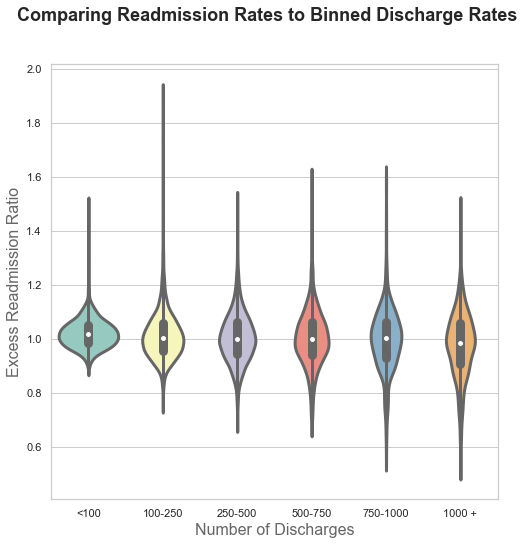

In [152]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(8, 8))

# Show each distribution with both violins and points
sns.violinplot(x='discharge_categories',y='excess_readmission_ratio',data=data_c2, inner="box", 
               palette="Set3", cut=2, linewidth=3)

f.suptitle('Comparing Readmission Rates to Binned Discharge Rates', fontsize=18, fontweight='bold')
ax.set_xlabel("Number of Discharges",size = 16,alpha=0.7)
ax.set_ylabel("Excess Readmission Ratio",size = 16,alpha=0.7)
plt.show()

Q5) Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?
Construct another plot that conveys the same information in a more direct manner.

The original scatterplot does a nice job in showing the inverse relationship with excess readmission rates and the number
of dischages that occured in this study.  This shows the mean excess readmission rate drops slowly from 1.023 to 0.978 for the number of readmssions that are more than 1000.  The disadvantages of this plot are the massive amount on scatter points on the graph (up to 1000 number of discharges) and this needs to be spread out more to look at the distribution of the data.

The same plot was used to graph out the data that was divided into three categories.  These were the attributes that had less than 100, between 101 and 999 and more than 1000 discharges.  This helped spread out the data a little more to see the distribution, but it was still a lot of points that needed to be more spread out.  

The same three categories were also used to look at a hexagram scatterplot and histogram to look at the spread of the distribution and this does gives a better visualization of the spread of the data over these values and can be seen above. The data is still clumped together so the next approach is to bin the number of discharges.   

Finally, the data was grouped or binned into a total of six categories and these are < 100, 100 - 250, 250-500, 500-750, 750-1000 and > 1000 number of discharges.  A Violin plot was used to graph these six categories and this did a nice job of cleaning up the scatterpoints and putting these into the violin plots.  These plots show where the median, interquartile range and 1.5x interquartile range of values can be seen for each of these categories going from less than 100 to more than 1000 number of discharges.  This shows a higher probability of getting a value of 1.023 readmission rate for the number of discharges less than 100 and then the probability is beginning to flatten out as you add the number of discharges as shown in the last violin plot for the 1000 + number of discharges.  